In [1]:
import numfracpy as nfr
import scipy.special as special
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc

rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
%matplotlib inline

nfr.FODE(f,Initial,Interv,dx,alpha)

Returns: the numerical solution of the equation

$${}_C D_{0,t}^{\alpha} u(t) = f(t,u(t))$$

on the interval _Interv_ with initial conditions given in the list _Initial_ and $\alpha$ is equal to the order of the fractional derivative. _dx_ is the discretization step on the independent variable.

The numerical solution of the initial value problem

$$\begin{cases} {}_C D_{0,t}^{\alpha} u(t) = f(t,u(t)), &  m-1 < \alpha < m \in \mathbb{Z^+} \\ 
u^j (0) = u_{0}^j, &  j=0,1,\cdots,m-1 \end{cases}$$

where ${}_C D_{0,t}^{\alpha}$ is the Caputo derivative and $u_{0}^j$ is the $j^{\rm th}$ derivative of $u$ at $t=0$. This problem is equivalent [K. Diethelm and N.J. Ford, Analysis of fractional differential equations, J. Math. Anal. Appl. 265 (2002) 229–248] to the following Volterra integral equation

$$u(t) = \sum_{j=0}^{m-1}\frac{t^j}{j!}u_{0}^j + \frac{1}{\Gamma(\alpha)} \int_0^t (t-s)^{\alpha - 1} f(s,u(s))ds
= \sum_{j=0}^{m-1}\frac{t^j}{j!}u_{0}^j + {}_{RL}D_{0,t}^{-\alpha} f(t,u(t))$$

To solve this problem, we use the _fractional Adams method_ [Numerical Methods for Fractional Calculus, page 104] based on the following relations

\begin{align}
u_{n+1}^P &= \sum_{j=0}^{m-1}\frac{t_{n+1}^j}{j!}u_{0}^j + \Delta t^{\alpha} \sum_{j=0}^n b_{j,n+1}f(t_{j},u_{j})\\
u_{n+1} &= \sum_{j=0}^{m-1}\frac{t_{n+1}^j}{j!}u_{0}^j + \sum_{j=0}^n a_{j,n+1}f(t_{j},u_{j}) + a_{n+1,n+1}f(t_{n+1},u_{n+1}^P)
\end{align}
where

$$b_{j,n+1} = \frac{1}{\Gamma(\alpha + 1)} \left[(n-j+1)^{\alpha} - (n-j)^{\alpha}\right]$$

$$a_{j,n+1} = \frac{\Delta t^{\alpha}}{\Gamma(\alpha + 2)}\begin{cases} 
n^{\alpha+1} - (n-\alpha)(n+1)^{\alpha} , &  j = 0 \\ 
(n-j+2)^{\alpha+1} - 2(n-j+1)^{\alpha+1} + (n-j)^{\alpha+1}, &  1 \leq j \leq n \\
1, &  j = n + 1 \end{cases}$$

### Example:  ${}_C D_{0,t}^{\alpha} u(t) = 1 - u(t)$;    $0 \leq \alpha \leq 1$, $t \in [0,5]$

In [2]:
def f(t,u):
    return 1 - u

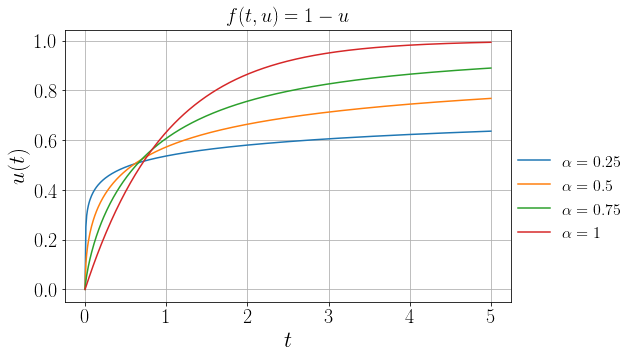

In [3]:
fig = plt.figure(figsize=(8,5))
plt.title(r'$f(t,u)=1 - u$',y=1.01,size=20)

Initial = [0]
Interv = [0,5]
dx = 0.01

for alpha in [0.25, 0.50, 0.75, 1]:
    NumSol = nfr.FODE(f,Initial,Interv,dx,alpha)
    plt.plot(NumSol[0], NumSol[1], label=r'$\alpha='+str(round(alpha,2))+'$',linewidth=1.5)

plt.legend(loc=(1,0.2),shadow=False,ncol=1,prop={'size':16},frameon=False)
plt.grid(True)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel(r'$t$',size=23)
plt.ylabel(r'$u(t)$',size=23)
plt.show()
fig.savefig('FODE_1.png',dpi=100,bbox_inches='tight')

### Example:  ${}_C D_{0,t}^{\alpha} u(t) = 1 - u(t)$;    $1 \leq \alpha < 2$, $t \in [0,20]$

In [4]:
def f(t,u):
    return 1 - u

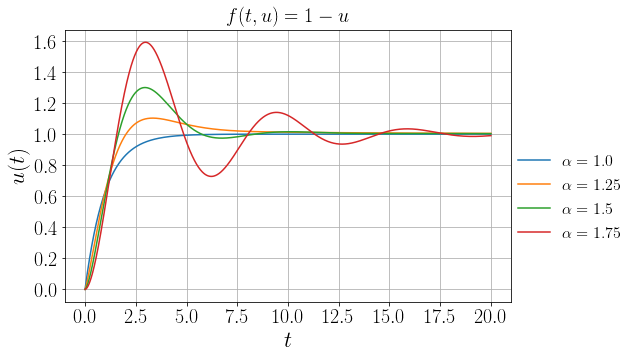

In [5]:
fig = plt.figure(figsize=(8,5))
plt.title(r'$f(t,u)=1 - u$',y=1.01,size=20)

Initial = [0]
Interv = [0,20]
dx = 0.01
alpha = 1.0

NumSol = nfr.FODE(f,Initial,Interv,dx,alpha)
plt.plot(NumSol[0], NumSol[1], label=r'$\alpha='+str(round(alpha,2))+'$',linewidth=1.5)

Initial = [0,0]
for alpha in [1.25, 1.50, 1.75]:
    NumSol = nfr.FODE(f,Initial,Interv,dx,alpha)
    plt.plot(NumSol[0], NumSol[1], label=r'$\alpha='+str(round(alpha,2))+'$',linewidth=1.5)

plt.legend(loc=(1,0.2),shadow=False,ncol=1,prop={'size':16},frameon=False)
plt.grid(True)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel(r'$t$',size=23)
plt.ylabel(r'$u(t)$',size=23)
plt.show()
fig.savefig('FODE_2.png',dpi=100,bbox_inches='tight')

### Example: ${}_C D_{0,t}^{\alpha}u(t) + u^{2}(t) = f(t)$;    $0 < \alpha < 1$, $t \in [0,5]$

Let us solve this problem for 

$$f(t) = \frac{\Gamma(6)}{\Gamma(6-\alpha)}t^{5-\alpha} - 3\frac{\Gamma(5)}{\Gamma(5-\alpha)}t^{4-\alpha} + 2\frac{\Gamma(4)}{\Gamma(4-\alpha)}t^{3-\alpha} + (t^5 - 3t^4 + 2t^3)^2$$

with initial condition $u(0) = 0$ and $\alpha = 1/2$. The analytical solution is given by [Numerical Methods for Fractional Calculus, page 109]

$$u(t) = t^5 - 3t^4 + 2t^3$$

In [6]:
def f(t,alpha):
    return special.gamma(6)*(t**(5-alpha))/special.gamma(6-alpha) - 3*special.gamma(5)*(t**(4-alpha))/special.gamma(5-alpha) + 2*special.gamma(4)*(t**(3-alpha))/special.gamma(4-alpha) + (t**5 - 3*(t**4) + 2*(t**3))**2
def g(t,u):
    return f(t,0.5) - u**2
def u_Exact(t):
    return t**5 - 3*(t**4) + 2*(t**3)

3.103173985369995e-05


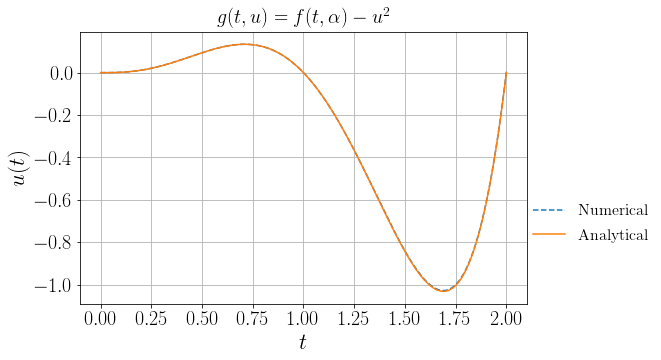

In [7]:
fig = plt.figure(figsize=(8,5))
plt.title(r'$g(t,u)= f(t,\alpha) - u^{2}$',y=1.01,size=20)

Initial = [0]
a = 0 
b = 2.0
Interv = [a,b]
dx = 0.01
alpha = 0.5
#Numerical Solution
NumSol = nfr.FODE(g,Initial,Interv,dx,alpha)

plt.plot(NumSol[0], NumSol[1], '--', label=r'Numerical',linewidth=1.5)

#Analytical Solution
t = np.linspace(a,b,100)
u = u_Exact(t)
plt.plot(t, u, label=r'Analytical',linewidth=1.5)
n = int((1-a)/dx)

print(abs(NumSol[1][n] - u_Exact(1)))

plt.legend(loc=(1,0.2),shadow=False,ncol=1,prop={'size':16},frameon=False)
plt.grid(True)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel(r'$t$',size=23)
plt.ylabel(r'$u(t)$',size=23)
plt.show()
fig.savefig('FODE_3.png',dpi=100,bbox_inches='tight')